<a href="https://colab.research.google.com/github/thienthanhtt/DataAnalysis_Diagnosis-of-diabetes-based-on-data-set-of-blood-test-result/blob/main/PTDL_BTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('/content/drive/MyDrive/PTDL/Diabetes_Classification.csv')
df = df.drop(df.columns[0], axis = 1)

In [27]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50.0,F,24.0,4.20,0.90,2.40,1.40,46.0,4.7,0.0
1,26.0,M,23.0,3.70,1.40,1.10,2.10,62.0,4.5,0.0
2,33.0,M,21.0,4.90,1.00,0.80,2.00,46.0,7.1,0.0
3,45.0,F,21.0,2.90,1.00,1.00,1.50,24.0,2.3,0.0
4,50.0,F,24.0,3.60,1.30,0.90,2.10,50.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5327,56.0,M,33.0,5.00,1.70,1.45,1.90,84.0,5.0,1.0
5328,61.0,F,39.0,3.80,3.00,0.90,1.70,111.0,10.5,1.0
5329,60.0,M,24.0,3.40,5.30,1.10,3.60,70.0,7.5,0.0
5330,52.0,F,24.0,5.07,1.08,1.37,3.31,57.3,4.5,0.0


# General observation about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5310 non-null   float64
 1   Gender     5332 non-null   object 
 2   BMI        5309 non-null   float64
 3   Chol       5306 non-null   float64
 4   TG         5300 non-null   float64
 5   HDL        5310 non-null   float64
 6   LDL        5314 non-null   float64
 7   Cr         5311 non-null   float64
 8   BUN        5311 non-null   float64
 9   Diagnosis  5313 non-null   float64
dtypes: float64(9), object(1)
memory usage: 416.7+ KB


In [ ]:
df.describe().round(3)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5310.000,5309.000,5306.000,5300.000,5310.000,5314.000,5311.000,5311.000,5313.000
mean,48.638,24.130,4.690,1.504,1.346,2.705,70.626,4.596,0.203
std,15.253,7.719,3.448,3.984,4.349,3.911,29.764,4.919,3.367
min,-94.000,-99.000,-82.000,-94.000,-95.000,-98.000,-93.000,-98.000,-83.000
25%,36.000,22.000,4.180,0.900,1.090,2.270,57.750,3.900,0.000
50%,49.000,24.000,4.800,1.370,1.300,2.780,70.000,4.710,0.000
75%,59.000,27.000,5.460,2.100,1.590,3.390,81.400,5.600,1.000
max,93.000,47.000,11.650,32.640,9.900,9.900,800.000,38.900,1.000


In [ ]:
df['Age'].describe()

count    5310.000000
mean       48.637853
std        15.253447
min       -94.000000
25%        36.000000
50%        49.000000
75%        59.000000
max        93.000000
Name: Age, dtype: float64

In [ ]:
df['BMI'].describe()

count    5309.000000
mean       24.130345
std         7.718847
min       -99.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        47.000000
Name: BMI, dtype: float64

In [ ]:
df['Chol'].describe()

count    5306.000000
mean        4.689629
std         3.448396
min       -82.000000
25%         4.180000
50%         4.800000
75%         5.460000
max        11.650000
Name: Chol, dtype: float64

In [ ]:
df['TG'].describe()

count    5300.000000
mean        1.503966
std         3.983595
min       -94.000000
25%         0.900000
50%         1.370000
75%         2.100000
max        32.640000
Name: TG, dtype: float64

In [ ]:
df['HDL'].describe()

count    5310.000000
mean        1.346343
std         4.349107
min       -95.000000
25%         1.090000
50%         1.300000
75%         1.590000
max         9.900000
Name: HDL, dtype: float64

In [ ]:
df['LDL'].describe()

count    5314.000000
mean        2.705066
std         3.910821
min       -98.000000
25%         2.270000
50%         2.780000
75%         3.390000
max         9.900000
Name: LDL, dtype: float64

In [ ]:
df['Cr'].describe()

count    5311.000000
mean       70.626207
std        29.763911
min       -93.000000
25%        57.750000
50%        70.000000
75%        81.400000
max       800.000000
Name: Cr, dtype: float64

In [ ]:
df['BUN'].describe()

count    5311.000000
mean        4.596416
std         4.919204
min       -98.000000
25%         3.900000
50%         4.710000
75%         5.600000
max        38.900000
Name: BUN, dtype: float64

In [ ]:
df['Diagnosis'].describe()

count    5313.000000
mean        0.203087
std         3.366983
min       -83.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Diagnosis, dtype: float64

Số dòng dữ liệu có giá trị NaN đối với từng thuộc tính

In [ ]:
print(df.isna().sum())

Age          22
Gender        0
BMI          23
Chol         26
TG           32
HDL          22
LDL          18
Cr           21
BUN          21
Diagnosis    19
dtype: int64


Số dòng dữ liệu trùng

In [ ]:
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))

200


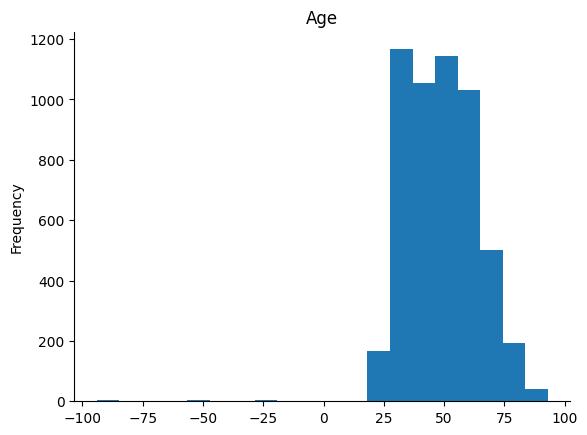

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

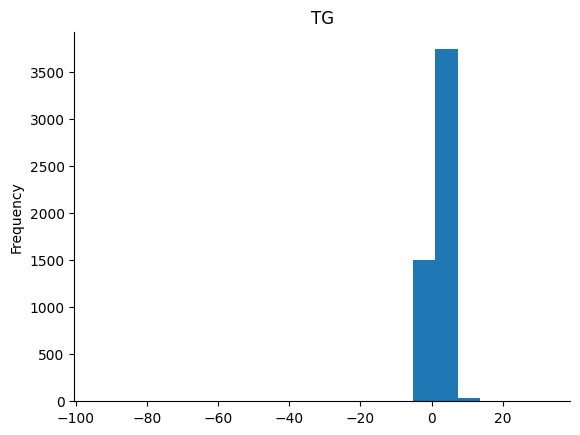

In [ ]:
from matplotlib import pyplot as plt
df['TG'].plot(kind='hist', bins=20, title='TG')
plt.gca().spines[['top', 'right',]].set_visible(False)

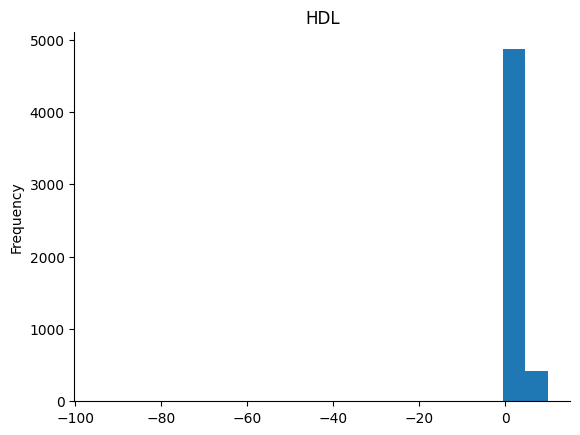

In [ ]:
from matplotlib import pyplot as plt
df['HDL'].plot(kind='hist', bins=20, title='HDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

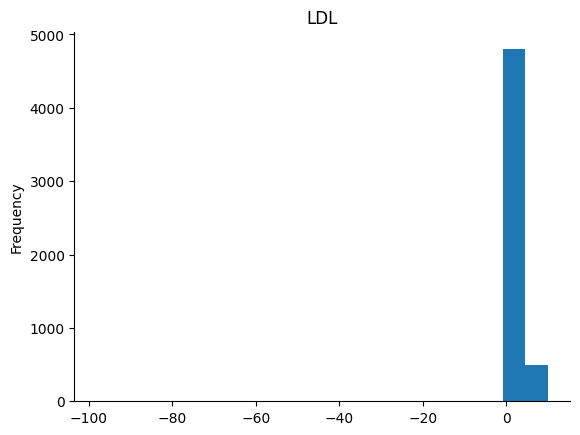

In [ ]:
from matplotlib import pyplot as plt
df['LDL'].plot(kind='hist', bins=20, title='LDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

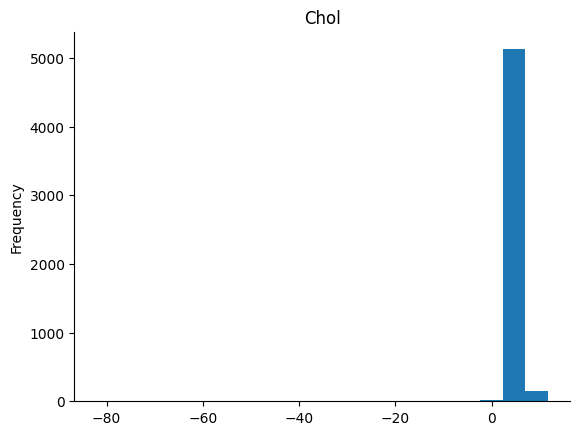

In [ ]:
from matplotlib import pyplot as plt
df['Chol'].plot(kind='hist', bins=20, title='Chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

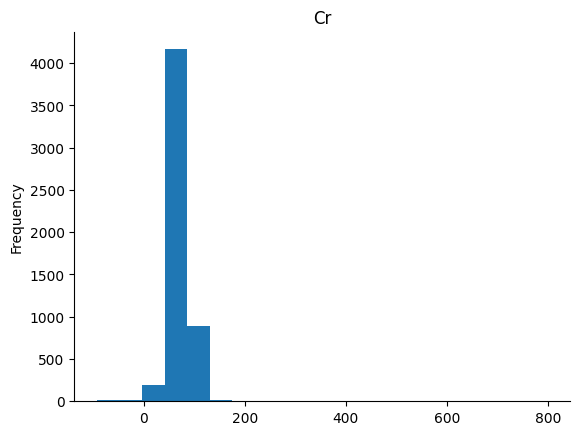

In [ ]:
from matplotlib import pyplot as plt
df['Cr'].plot(kind='hist', bins=20, title='Cr')
plt.gca().spines[['top', 'right',]].set_visible(False)

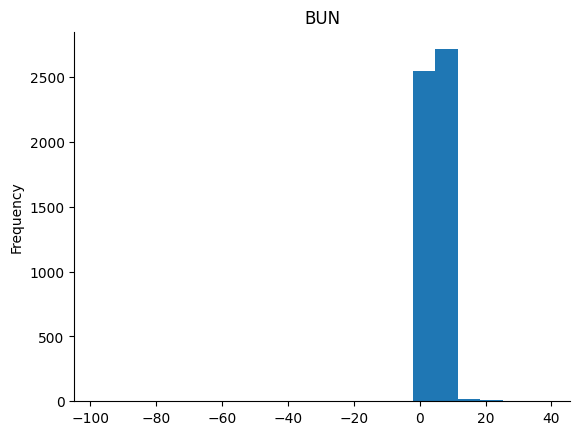

In [ ]:
from matplotlib import pyplot as plt
df['BUN'].plot(kind='hist', bins=20, title='BUN')
plt.gca().spines[['top', 'right',]].set_visible(False)

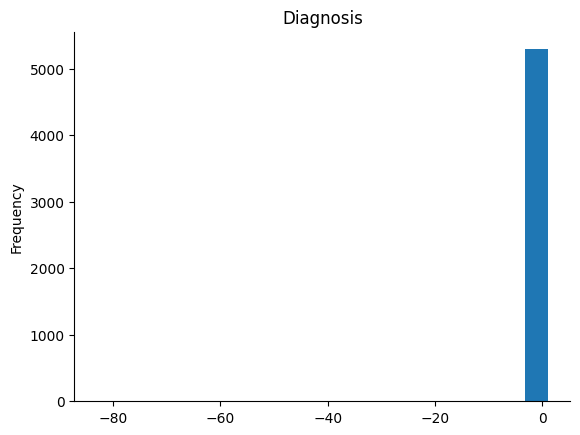

In [ ]:
from matplotlib import pyplot as plt
df['Diagnosis'].plot(kind='hist', bins=20, title='Diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

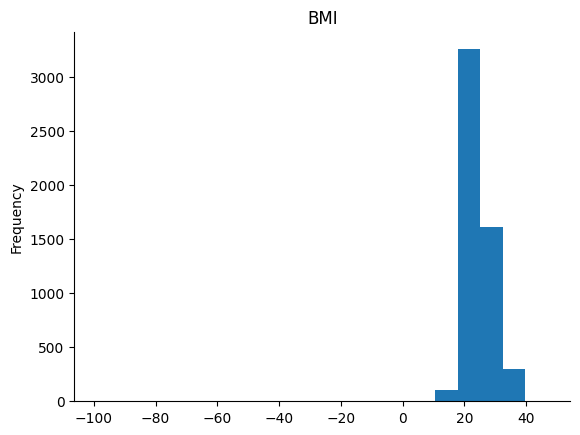

In [ ]:
from matplotlib import pyplot as plt
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

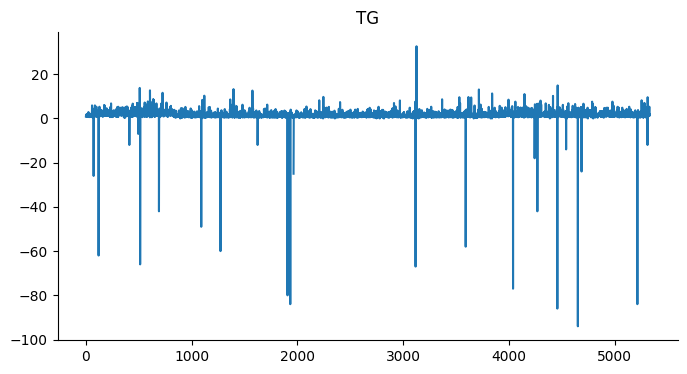

In [ ]:
from matplotlib import pyplot as plt
df['TG'].plot(kind='line', figsize=(8, 4), title='TG')
plt.gca().spines[['top', 'right']].set_visible(False)

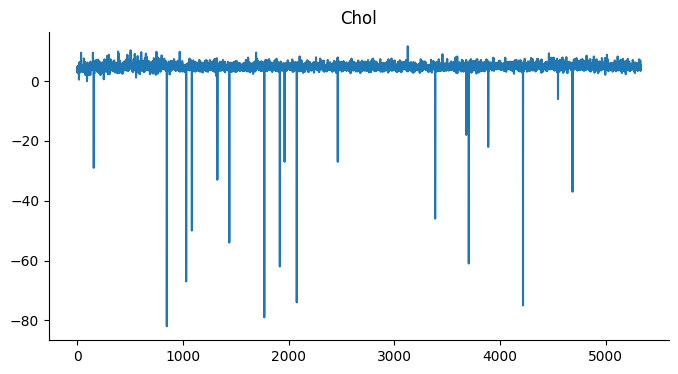

In [ ]:
from matplotlib import pyplot as plt
df['Chol'].plot(kind='line', figsize=(8, 4), title='Chol')
plt.gca().spines[['top', 'right']].set_visible(False)

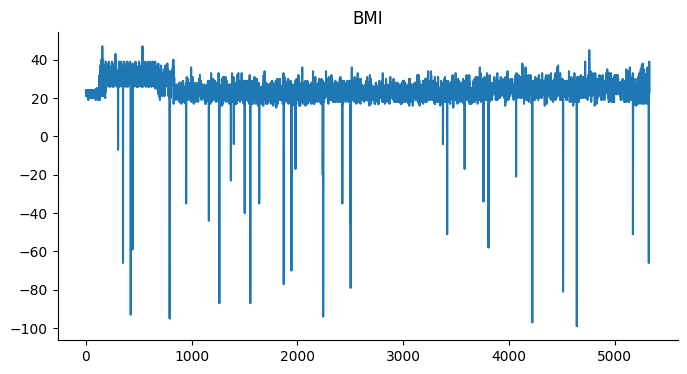

In [ ]:
from matplotlib import pyplot as plt
df['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

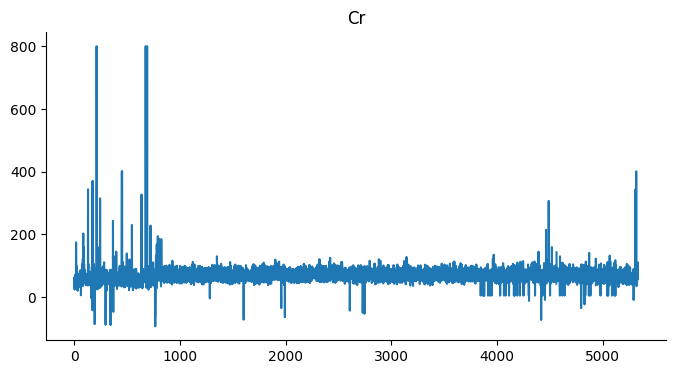

In [ ]:
from matplotlib import pyplot as plt
df['Cr'].plot(kind='line', figsize=(8, 4), title='Cr')
plt.gca().spines[['top', 'right']].set_visible(False)

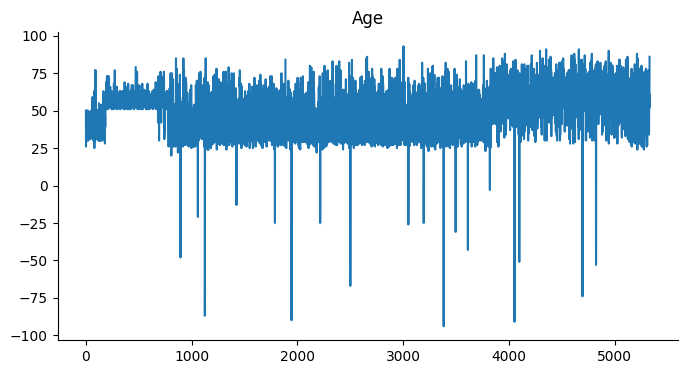

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

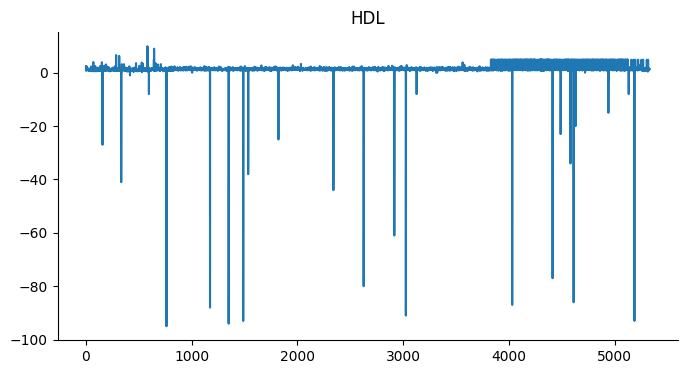

In [ ]:
from matplotlib import pyplot as plt
df['HDL'].plot(kind='line', figsize=(8, 4), title='HDL')
plt.gca().spines[['top', 'right']].set_visible(False)

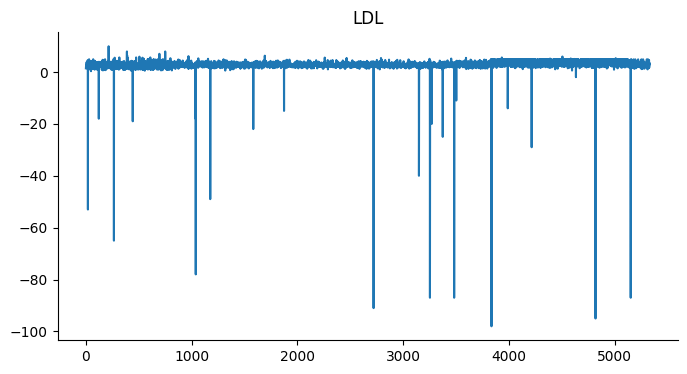

In [ ]:
from matplotlib import pyplot as plt
df['LDL'].plot(kind='line', figsize=(8, 4), title='LDL')
plt.gca().spines[['top', 'right']].set_visible(False)

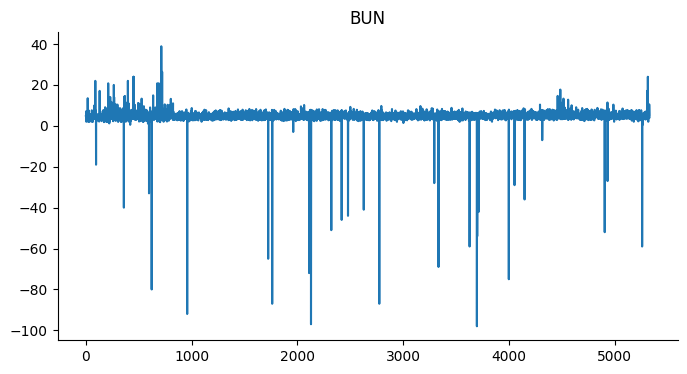

In [ ]:
from matplotlib import pyplot as plt
df['BUN'].plot(kind='line', figsize=(8, 4), title='BUN')
plt.gca().spines[['top', 'right']].set_visible(False)

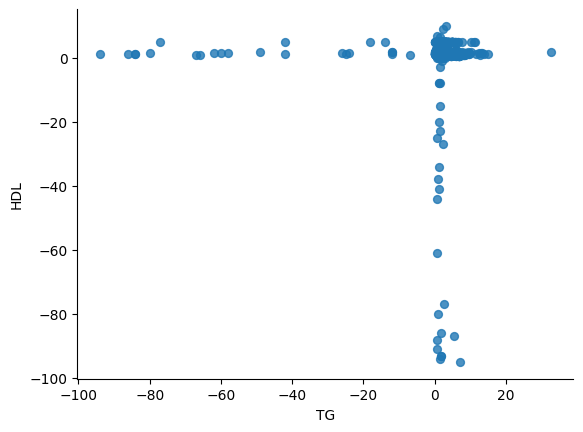

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='TG', y='HDL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

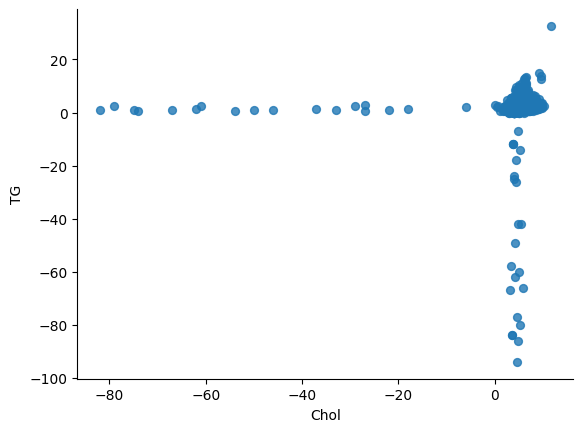

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Chol', y='TG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

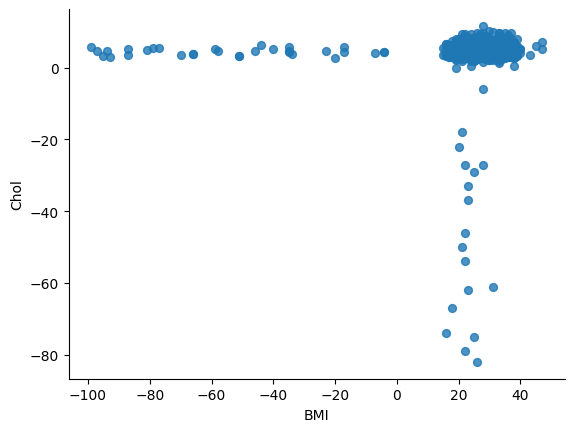

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BMI', y='Chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

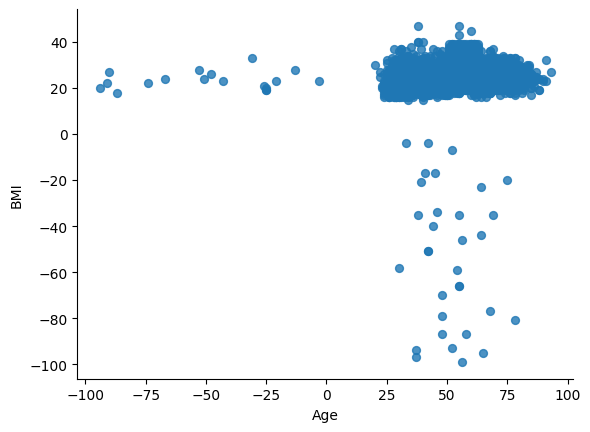

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

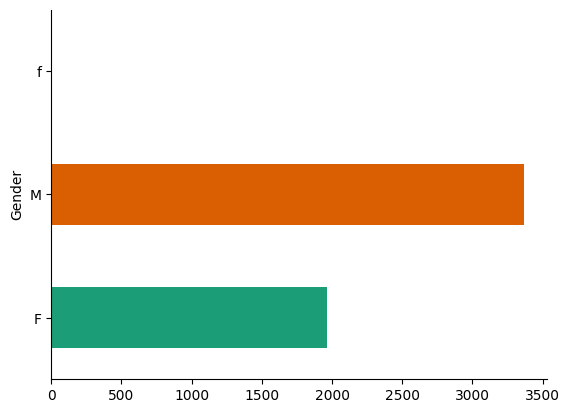

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Gender'].value_counts()

Gender
M    3365
F    1966
f       1
Name: count, dtype: int64

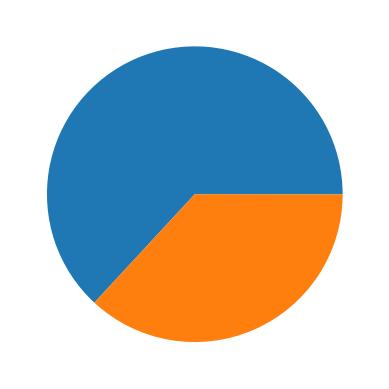

In [ ]:
plt.pie(df['Gender'].value_counts())
plt.show()

# Pre-processing data

Chuẩn hóa các gái trị của thuộc tính `Gender`

In [28]:
df['Gender'] = df['Gender'].replace('f', 'F')

In [29]:
df['Gender'].value_counts()

Gender
M    3365
F    1967
Name: count, dtype: int64

Xóa các dòng dữ liệu trùng lặp

In [30]:
df =  df.drop_duplicates()
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [31]:
duplicated_rows = df[df.duplicated()]
print(len(duplicated_rows))

0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5131 entries, 0 to 5130
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5109 non-null   float64
 1   Gender     5131 non-null   object 
 2   BMI        5108 non-null   float64
 3   Chol       5106 non-null   float64
 4   TG         5100 non-null   float64
 5   HDL        5109 non-null   float64
 6   LDL        5113 non-null   float64
 7   Cr         5110 non-null   float64
 8   BUN        5111 non-null   float64
 9   Diagnosis  5113 non-null   float64
dtypes: float64(9), object(1)
memory usage: 401.0+ KB


Xóa các dòng dữ liệu chứa giá trị NaN

In [33]:
df = df.dropna()
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [34]:
print(df.isna().sum())

Age          0
Gender       0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4932 non-null   float64
 1   Gender     4932 non-null   object 
 2   BMI        4932 non-null   float64
 3   Chol       4932 non-null   float64
 4   TG         4932 non-null   float64
 5   HDL        4932 non-null   float64
 6   LDL        4932 non-null   float64
 7   Cr         4932 non-null   float64
 8   BUN        4932 non-null   float64
 9   Diagnosis  4932 non-null   float64
dtypes: float64(9), object(1)
memory usage: 385.4+ KB


Xóa dòng chứa dữ liệu không hợp lệ

In [36]:
df = df.drop(df[(df['Age'].astype(float) < 0) |
                (df['BMI'].astype(float) < 0) |
                (df['Chol'].astype(float) < 0) |
                (df['TG'].astype(float) < 0) |
                (df['HDL'].astype(float) < 0) |
                (df['LDL'].astype(float) < 0) |
                (df['Cr'].astype(float) < 0) |
                (df['BUN'].astype(float) < 0) |
                (df['Diagnosis'].astype(float) < 0)].index)
df = df.reset_index()
df = df.drop(df.columns[0], axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4743 non-null   float64
 1   Gender     4743 non-null   object 
 2   BMI        4743 non-null   float64
 3   Chol       4743 non-null   float64
 4   TG         4743 non-null   float64
 5   HDL        4743 non-null   float64
 6   LDL        4743 non-null   float64
 7   Cr         4743 non-null   float64
 8   BUN        4743 non-null   float64
 9   Diagnosis  4743 non-null   float64
dtypes: float64(9), object(1)
memory usage: 370.7+ KB


In [38]:
df.describe().round(3)

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000,4743.000
mean,48.980,24.613,4.875,1.723,1.595,2.917,71.201,4.892,0.390
std,14.035,4.284,1.006,1.337,1.040,0.950,29.124,1.697,0.488
min,20.000,15.000,0.000,0.000,0.000,0.300,4.861,0.500,0.000
25%,36.000,22.000,4.200,0.910,1.100,2.290,58.000,3.910,0.000
50%,49.000,24.000,4.800,1.380,1.300,2.800,70.200,4.730,0.000
75%,59.000,27.000,5.470,2.100,1.590,3.400,81.700,5.580,1.000
max,93.000,47.000,11.650,32.640,9.900,9.900,800.000,38.900,1.000


Chia dữ liệu thành 2 tập train và test

In [39]:
label = df['Diagnosis']
n = round(len(df) * 10 / 100)

df_test = df.iloc[:n + 1]
df_valid = df.iloc[n + 1: n * 2 + 1]
df_train = df.iloc[n * 2 + 1:]

df_valid = df_valid.reset_index()
df_valid = df_valid.drop(df_valid.columns[0], axis = 1)

df_train = df_train.reset_index()
df_train = df_train.drop(df_train.columns[0], axis = 1)

label_test = label.iloc[:n + 1]
label_valid = label.iloc[n + 1 : n * 2 + 1]
label_train = label.iloc[n * 2 + 1:]

label_valid = label_valid.reset_index()
label_valid = label_valid.drop(label_valid.columns[0], axis = 1)

label_train = label_train.reset_index()
label_train = label_train.drop(label_train.columns[0], axis = 1)

In [40]:
label_train.value_counts()

Diagnosis
0.0          2583
1.0          1211
Name: count, dtype: int64

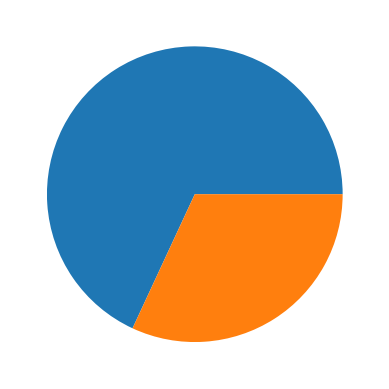

In [41]:
plt.pie(label_train.value_counts())
plt.show()

Cân bằng dữ liệu bằng phương pháp SMOTE

In [42]:
df_test['Gender'] = df_test['Gender'].replace('F', 0)
df_test['Gender'] = df_test['Gender'].replace('M', 1)

df_valid['Gender'] = df_valid['Gender'].replace('F', 0)
df_valid['Gender'] = df_valid['Gender'].replace('M', 1)

df_train['Gender'] = df_train['Gender'].replace('F', 0)
df_train['Gender'] = df_train['Gender'].replace('M', 1)

<ipython-input-42-6e8ffa5930d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = df_test['Gender'].replace('F', 0)
<ipython-input-42-6e8ffa5930d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Gender'] = df_test['Gender'].replace('M', 1)


In [43]:
from imblearn.over_sampling import SMOTE

#X = df_train[['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']]
smote = SMOTE(k_neighbors=5)
df_train, label_train = smote.fit_resample(df_train, label_train)

In [44]:
df_train['Age'] = df_train['Age'].astype(int)
df_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0
...,...,...,...,...,...,...,...,...,...,...
5161,53,1,23.501150,6.016874,2.667240,4.860753,4.860753,88.150345,5.421426,1.0
5162,61,0,32.000000,5.476786,1.451976,1.523511,3.231535,58.596315,3.756163,1.0
5163,53,1,27.699591,5.316049,2.737037,1.177984,3.036955,76.486966,3.362169,1.0
5164,68,0,24.755268,5.903046,2.176791,1.493841,3.404229,67.577634,5.147016,1.0


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5166 non-null   int64  
 1   Gender     5166 non-null   int64  
 2   BMI        5166 non-null   float64
 3   Chol       5166 non-null   float64
 4   TG         5166 non-null   float64
 5   HDL        5166 non-null   float64
 6   LDL        5166 non-null   float64
 7   Cr         5166 non-null   float64
 8   BUN        5166 non-null   float64
 9   Diagnosis  5166 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 403.7 KB


In [46]:
label_train.value_counts()

Diagnosis
0.0          2583
1.0          2583
Name: count, dtype: int64

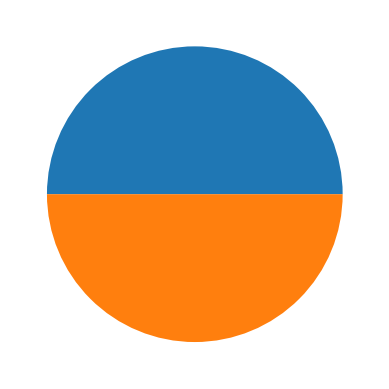

In [47]:
plt.pie(label_train.value_counts())
plt.show()

# The dataset after pre-processing

In [48]:
df_train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,35,1,24.000000,5.070000,3.110000,1.030000,3.180000,81.200000,3.380000,0.0
1,30,1,23.000000,4.820000,1.180000,1.450000,2.810000,97.100000,4.800000,0.0
2,40,0,20.000000,4.600000,0.500000,1.250000,2.620000,79.000000,3.790000,0.0
3,35,1,26.000000,4.900000,2.530000,1.390000,2.080000,86.000000,6.100000,0.0
4,50,1,21.000000,4.410000,0.870000,1.100000,2.650000,81.300000,6.420000,0.0
...,...,...,...,...,...,...,...,...,...,...
5161,53,1,23.501150,6.016874,2.667240,4.860753,4.860753,88.150345,5.421426,1.0
5162,61,0,32.000000,5.476786,1.451976,1.523511,3.231535,58.596315,3.756163,1.0
5163,53,1,27.699591,5.316049,2.737037,1.177984,3.036955,76.486966,3.362169,1.0
5164,68,0,24.755268,5.903046,2.176791,1.493841,3.404229,67.577634,5.147016,1.0


In [49]:
df_train.describe().round(3)

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.000,5166.0
mean,51.359,0.615,23.981,4.910,1.656,1.847,3.111,71.357,4.924,0.5
std,14.824,0.487,3.342,0.892,1.236,1.264,0.940,18.085,1.227,0.5
min,22.000,0.000,15.000,1.650,0.000,0.000,0.540,4.861,1.380,0.0
25%,38.000,0.000,22.000,4.300,0.936,1.150,2.431,60.000,4.081,0.0
50%,52.000,1.000,24.000,4.850,1.365,1.360,2.920,71.300,4.830,0.5
75%,62.000,1.000,26.000,5.461,2.010,1.690,3.589,82.111,5.600,1.0
max,93.000,1.000,45.000,11.650,32.640,4.861,6.270,307.000,17.730,1.0


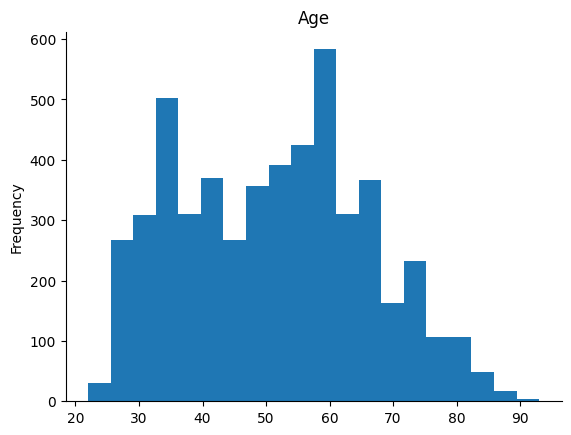

In [50]:
from matplotlib import pyplot as plt
df_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

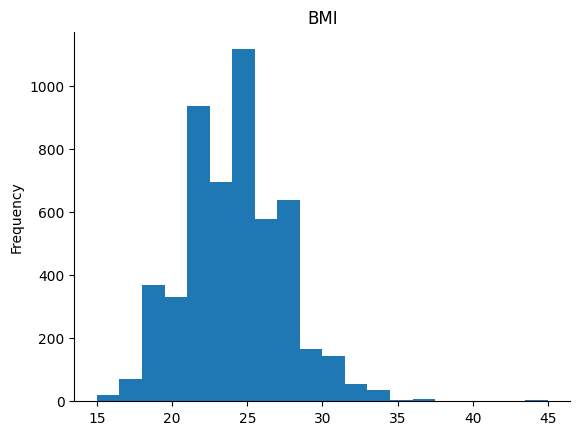

In [51]:
from matplotlib import pyplot as plt
df_train['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

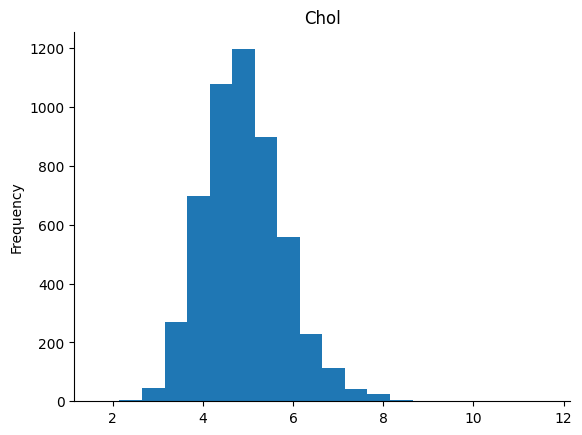

In [52]:
from matplotlib import pyplot as plt
df_train['Chol'].plot(kind='hist', bins=20, title='Chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

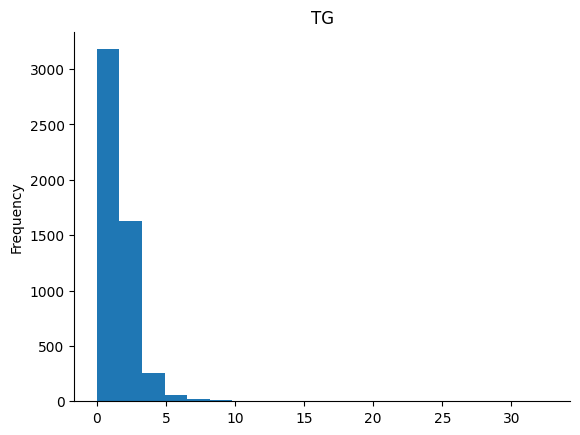

In [53]:
from matplotlib import pyplot as plt
df_train['TG'].plot(kind='hist', bins=20, title='TG')
plt.gca().spines[['top', 'right',]].set_visible(False)

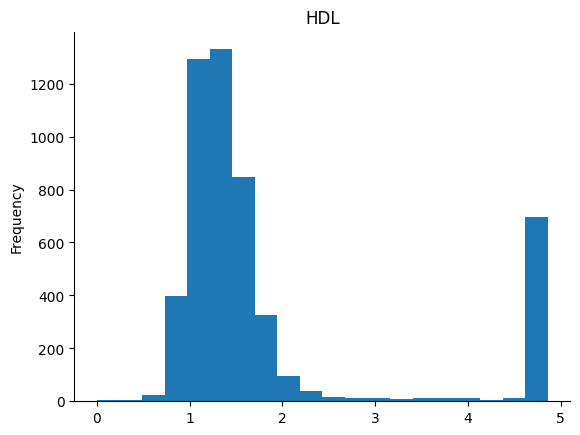

In [54]:
from matplotlib import pyplot as plt
df_train['HDL'].plot(kind='hist', bins=20, title='HDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

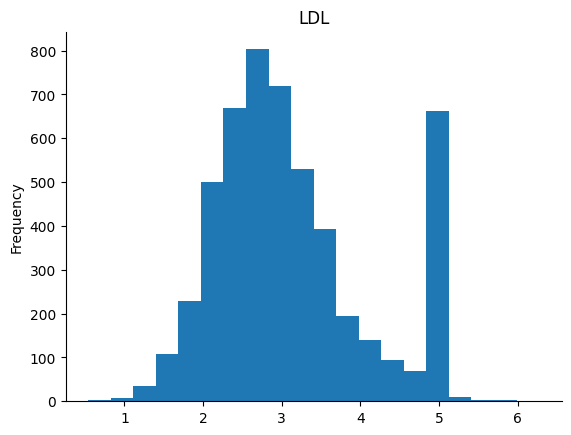

In [55]:
from matplotlib import pyplot as plt
df_train['LDL'].plot(kind='hist', bins=20, title='LDL')
plt.gca().spines[['top', 'right',]].set_visible(False)

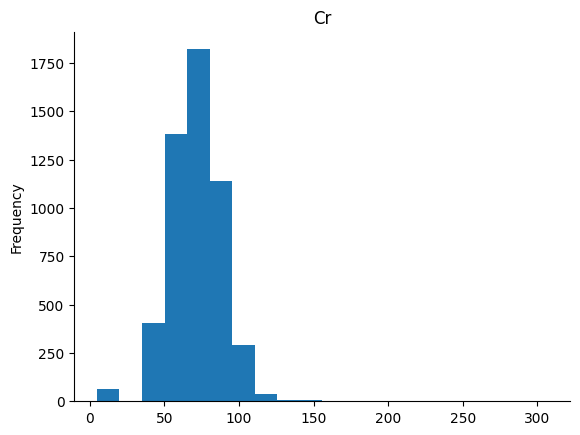

In [56]:
from matplotlib import pyplot as plt
df_train['Cr'].plot(kind='hist', bins=20, title='Cr')
plt.gca().spines[['top', 'right',]].set_visible(False)

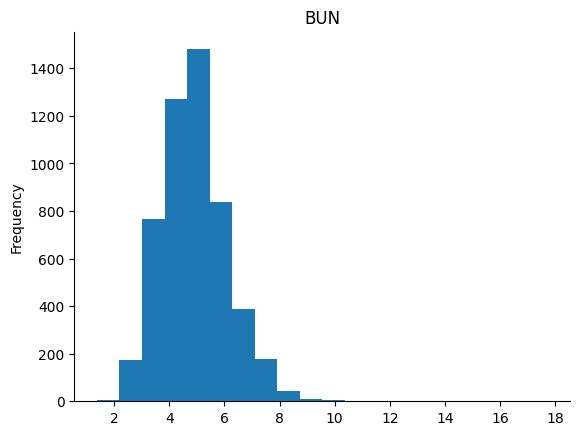

In [57]:
from matplotlib import pyplot as plt
df_train['BUN'].plot(kind='hist', bins=20, title='BUN')
plt.gca().spines[['top', 'right',]].set_visible(False)

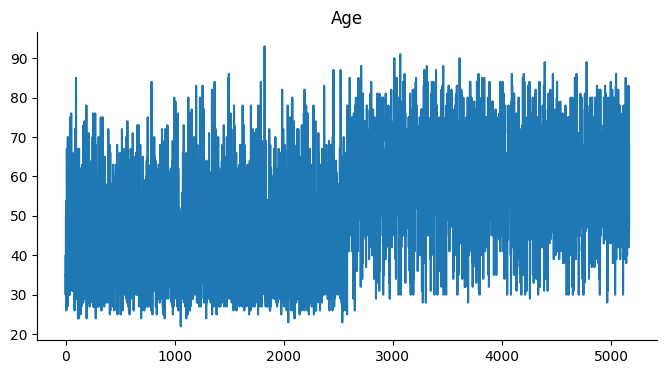

In [58]:
from matplotlib import pyplot as plt
df_train['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

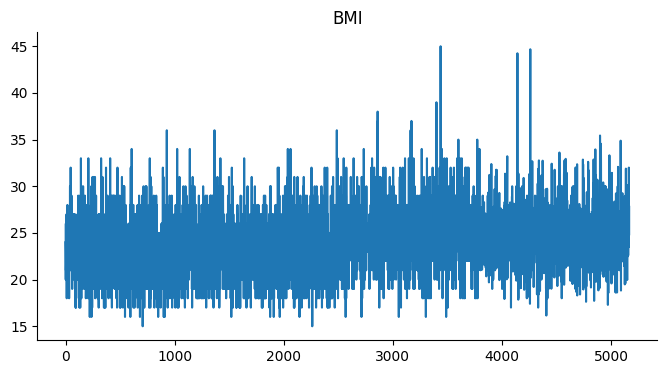

In [59]:
from matplotlib import pyplot as plt
df_train['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

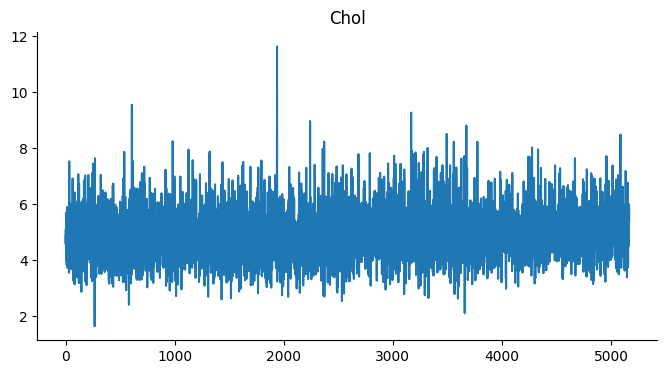

In [60]:
from matplotlib import pyplot as plt
df_train['Chol'].plot(kind='line', figsize=(8, 4), title='Chol')
plt.gca().spines[['top', 'right']].set_visible(False)

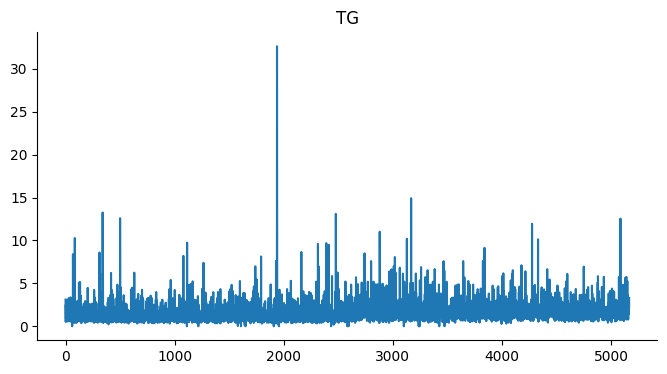

In [61]:
from matplotlib import pyplot as plt
df_train['TG'].plot(kind='line', figsize=(8, 4), title='TG')
plt.gca().spines[['top', 'right']].set_visible(False)

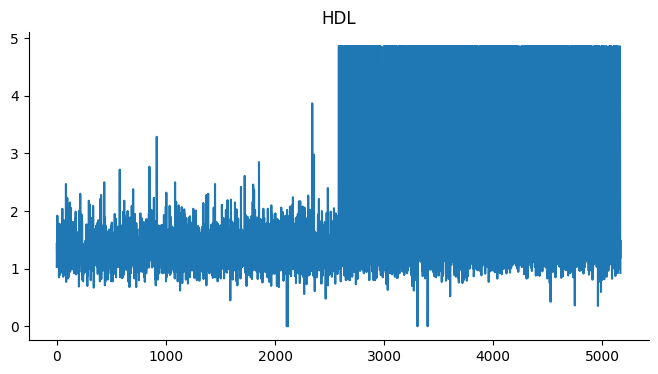

In [62]:
from matplotlib import pyplot as plt
df_train['HDL'].plot(kind='line', figsize=(8, 4), title='HDL')
plt.gca().spines[['top', 'right']].set_visible(False)

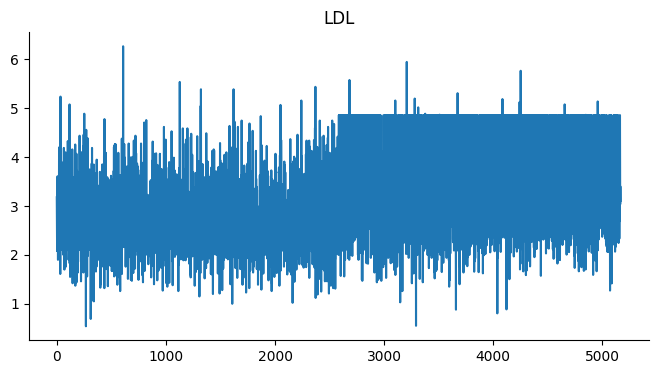

In [63]:
from matplotlib import pyplot as plt
df_train['LDL'].plot(kind='line', figsize=(8, 4), title='LDL')
plt.gca().spines[['top', 'right']].set_visible(False)

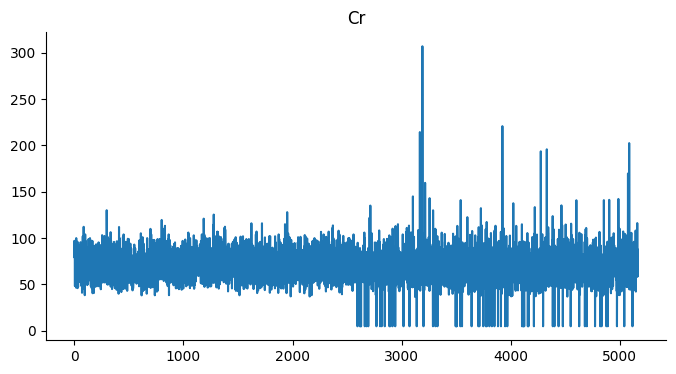

In [64]:
from matplotlib import pyplot as plt
df_train['Cr'].plot(kind='line', figsize=(8, 4), title='Cr')
plt.gca().spines[['top', 'right']].set_visible(False)

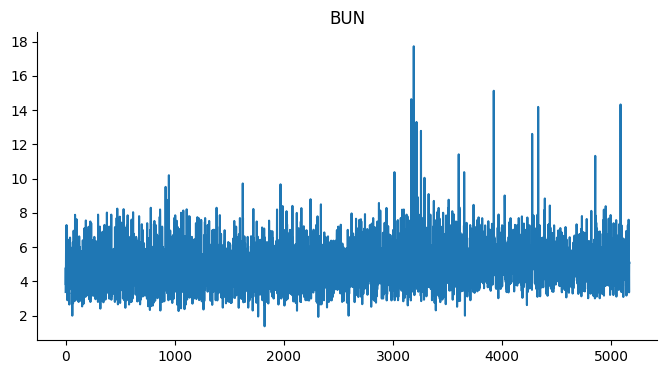

In [65]:
from matplotlib import pyplot as plt
df_train['BUN'].plot(kind='line', figsize=(8, 4), title='BUN')
plt.gca().spines[['top', 'right']].set_visible(False)